In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [75]:
PATH = "data/"
files = sorted([f'{PATH}{f}' for f in os.listdir(PATH) if f.endswith(".txt")])
print(files, len(files))

['data/aIN_1311_f109.txt', 'data/aIN_v133_f19.txt', 'data/aIN_v136_f14.txt', 'data/aIN_v146_f6.txt', 'data/aIN_v150_f13.txt', 'data/cIN_v120_f4.txt', 'data/cIN_v126_f10.txt', 'data/cIN_v128_f8.txt', 'data/cIN_v132_f14.txt', 'data/cIN_v134_f10.txt', 'data/dIN_1399_f12.txt', 'data/dIN_1401_f5.txt', 'data/dIN_1402_f5.txt', 'data/dIN_1403_f1.txt', 'data/dIN_1406_f3.txt', 'data/motoneuron_1429_f5.txt', 'data/motoneuron_1442_f49.txt', 'data/motoneuron_1443_f5.txt', 'data/motoneuron_1446_f30.txt', 'data/motoneuron_1447_f10.txt'] 20


In [76]:
fname = files[0]
ts = np.loadtxt(fname) #timeseries

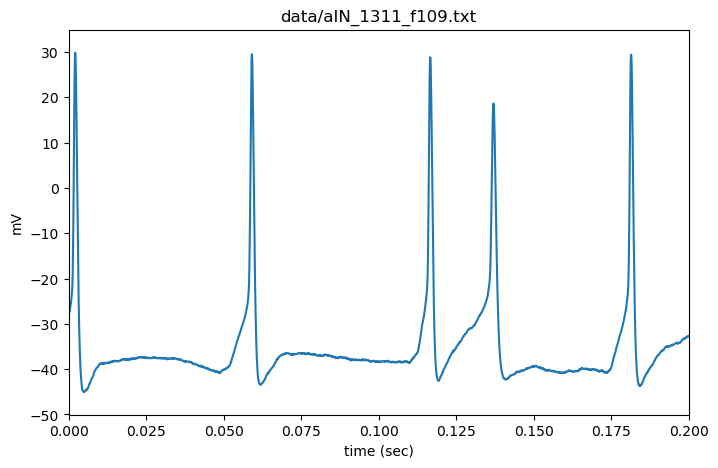

In [77]:
plt.figure(figsize=(8, 5))
plt.xlim(0, 0.2)
plt.xlabel('time (sec)')
plt.ylabel('mV')
plt.title(fname)
plt.plot(ts[:, 0], ts[:, 1])

In [78]:
def get_ts(fname):
    """
    get timeseries from text file
    preprocess the v (which I think is 0.1v, into mV)
    return the two column file as a numpy array of shape (-1, 2)
    """
    print(f"fetching {fname}")
    ts = np.loadtxt(fname)
    # preprocess, some contain mV, some contain V
    #TODO also ignore the time column, and make it from 0 at timestep of 0.1 ms
    # bring everything to mV?
    # the filename contains v, then it is in units of 0.1 volts (i think?)
    hasv = fname.split('_')[1][0] == 'v'
    if hasv:
        ts[:, 1] = ts[:, 1].copy()*100
    return ts

In [79]:
get_ts(files[1])

fetching data/aIN_v133_f19.txt


array([[  0.2024, -47.3633],
       [  0.2025, -47.3633],
       [  0.2026, -47.3633],
       ...,
       [  5.2009, -47.1191],
       [  5.201 , -47.1191],
       [  5.2011, -47.1191]])

In [80]:
iter(files).__next__()

'data/aIN_1311_f109.txt'

0 0 0
fetching data/aIN_1311_f109.txt
0 1 1
fetching data/aIN_v133_f19.txt
0 2 2
fetching data/aIN_v136_f14.txt
0 3 3
fetching data/aIN_v146_f6.txt
0 4 4
fetching data/aIN_v150_f13.txt
1 0 5
fetching data/cIN_v120_f4.txt
1 1 6
fetching data/cIN_v126_f10.txt
1 2 7
fetching data/cIN_v128_f8.txt
1 3 8
fetching data/cIN_v132_f14.txt
1 4 9
fetching data/cIN_v134_f10.txt
2 0 10
fetching data/dIN_1399_f12.txt
2 1 11
fetching data/dIN_1401_f5.txt
2 2 12
fetching data/dIN_1402_f5.txt
2 3 13
fetching data/dIN_1403_f1.txt
2 4 14
fetching data/dIN_1406_f3.txt
3 0 15
fetching data/motoneuron_1429_f5.txt
3 1 16
fetching data/motoneuron_1442_f49.txt
3 2 17
fetching data/motoneuron_1443_f5.txt
3 3 18
fetching data/motoneuron_1446_f30.txt
3 4 19
fetching data/motoneuron_1447_f10.txt


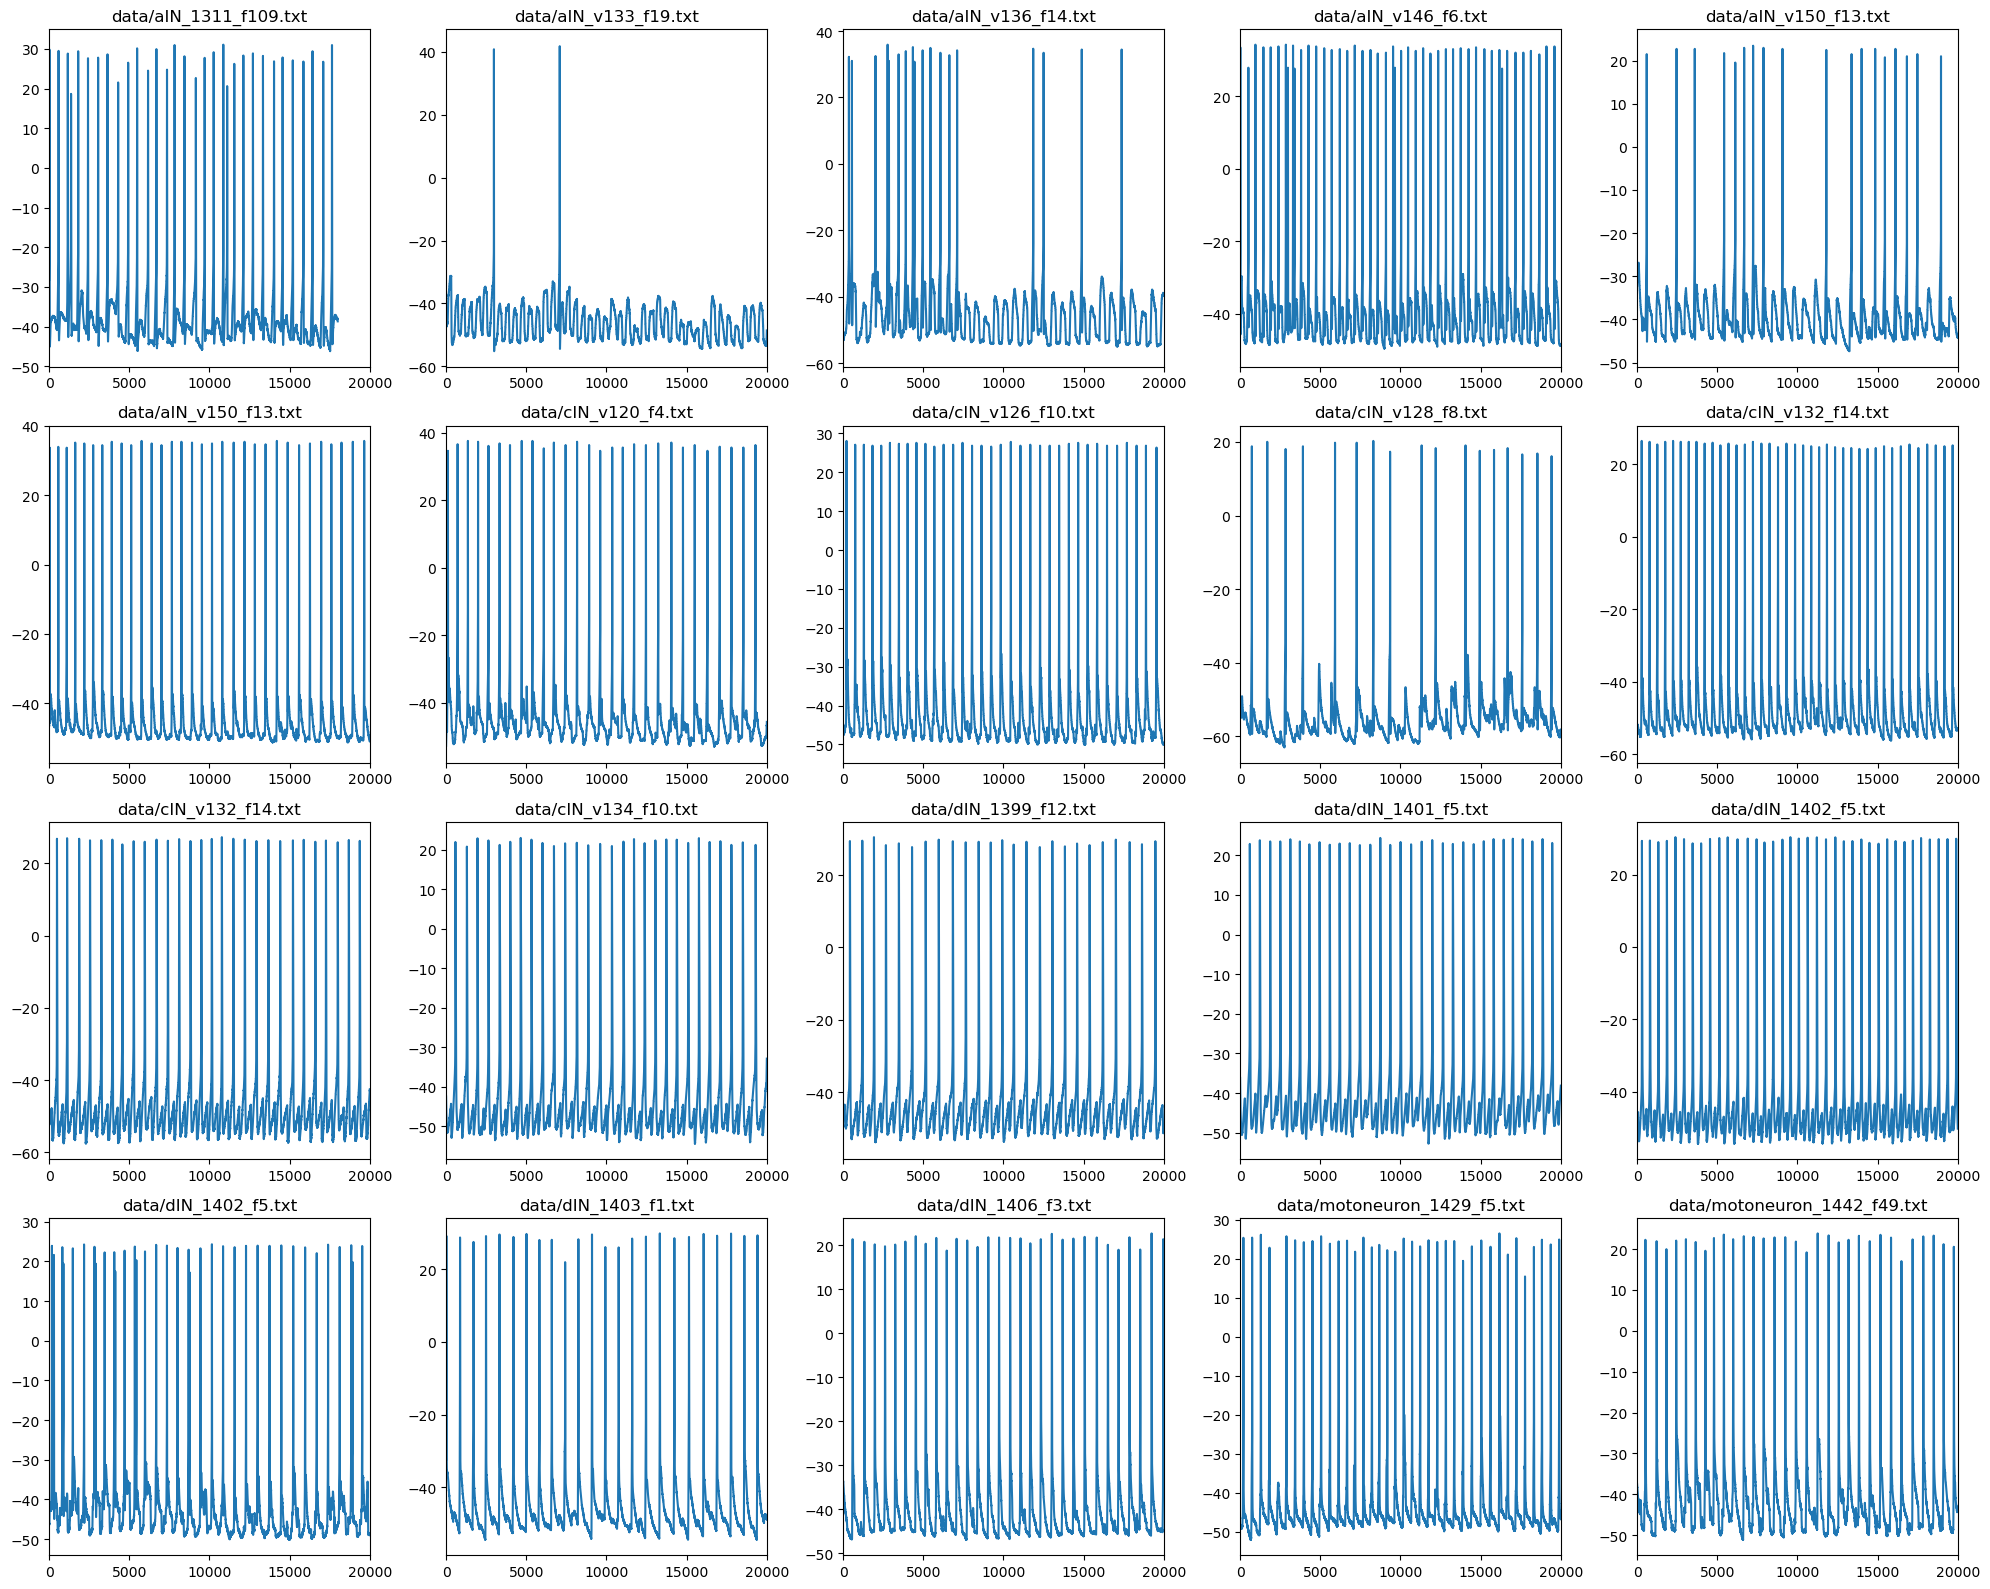

In [85]:
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(20, 16), sharex=False)
for r in range(4):
    for c in range(5):
        print(r, c, 5*r +c)
        ts = get_ts(files[5*r + c])
        ax[r][c].plot(np.arange(0, len(ts[:, 1])), ts[:, 1])
        ax[r][c].set(xlim=(0, 20000), title=files[4*r + c])


fig.tight_layout()